<a href="https://colab.research.google.com/github/AAA0145/DesignOptimization2021Fall/blob/main/HW4_update4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1
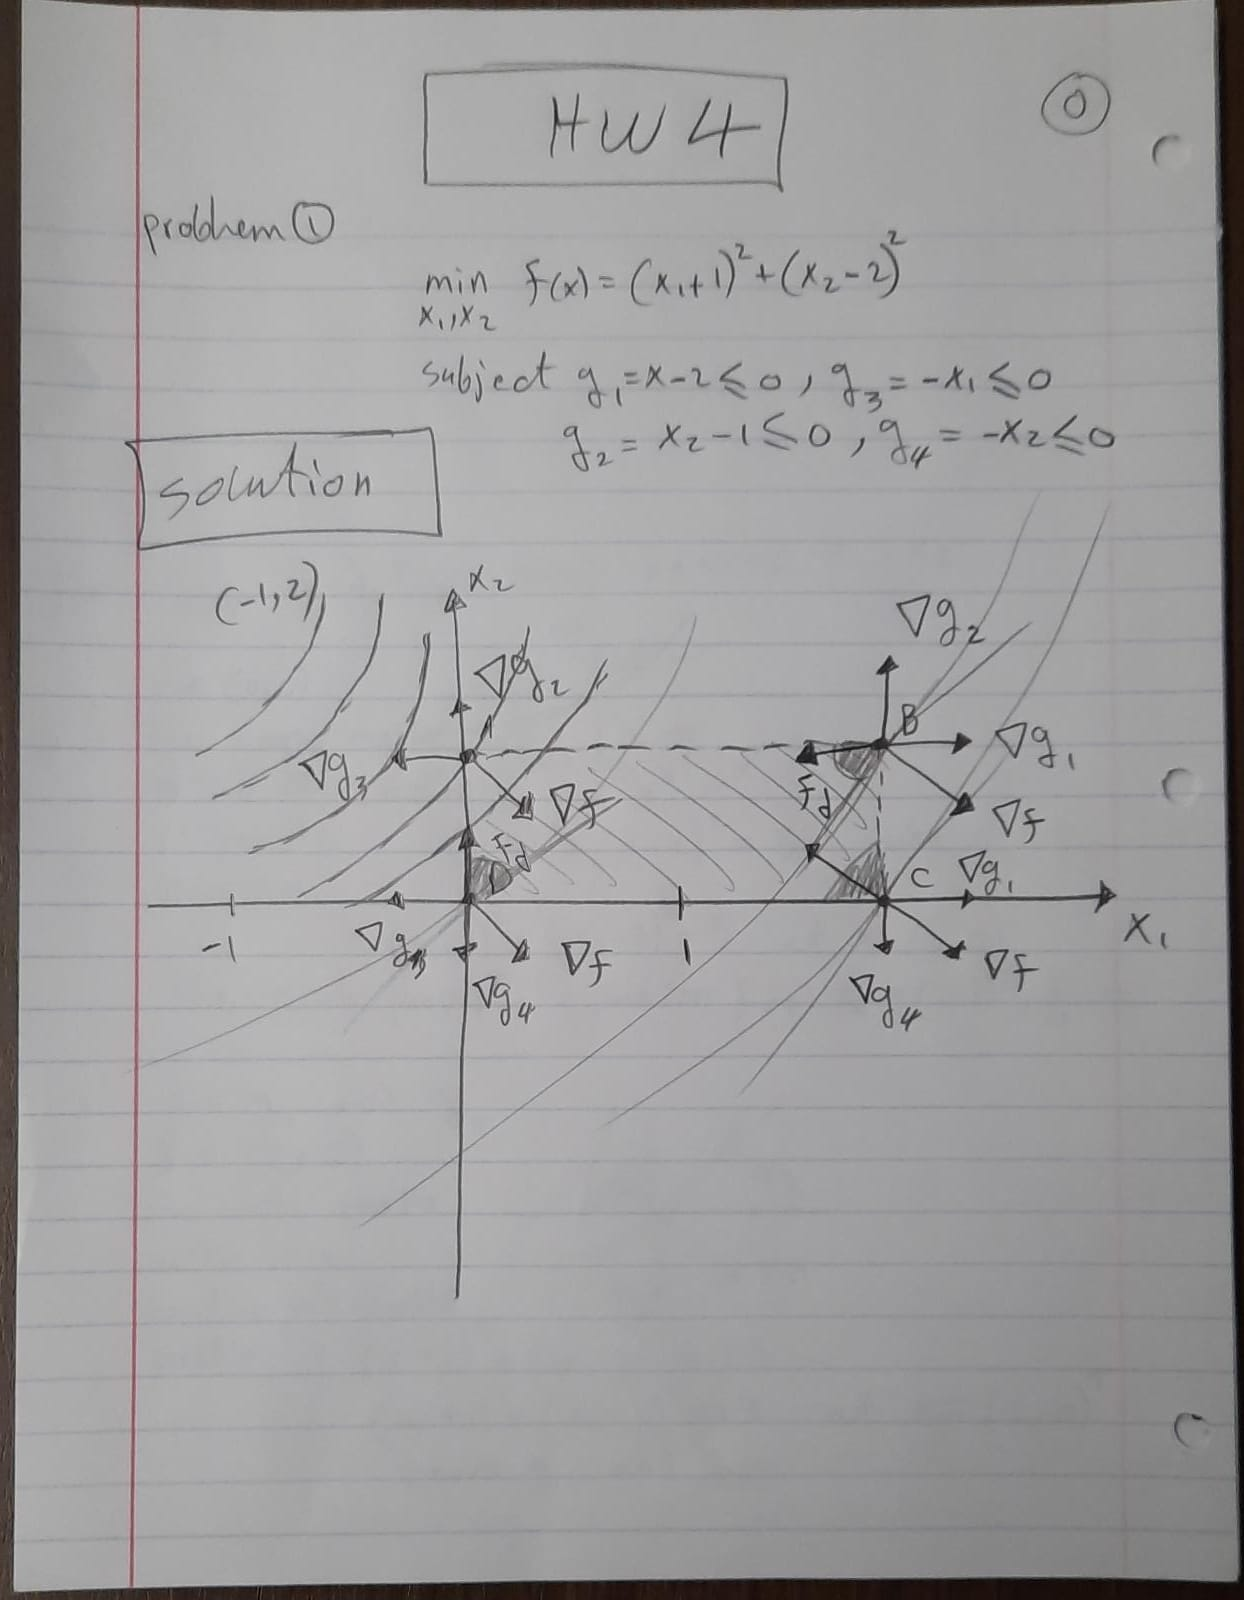

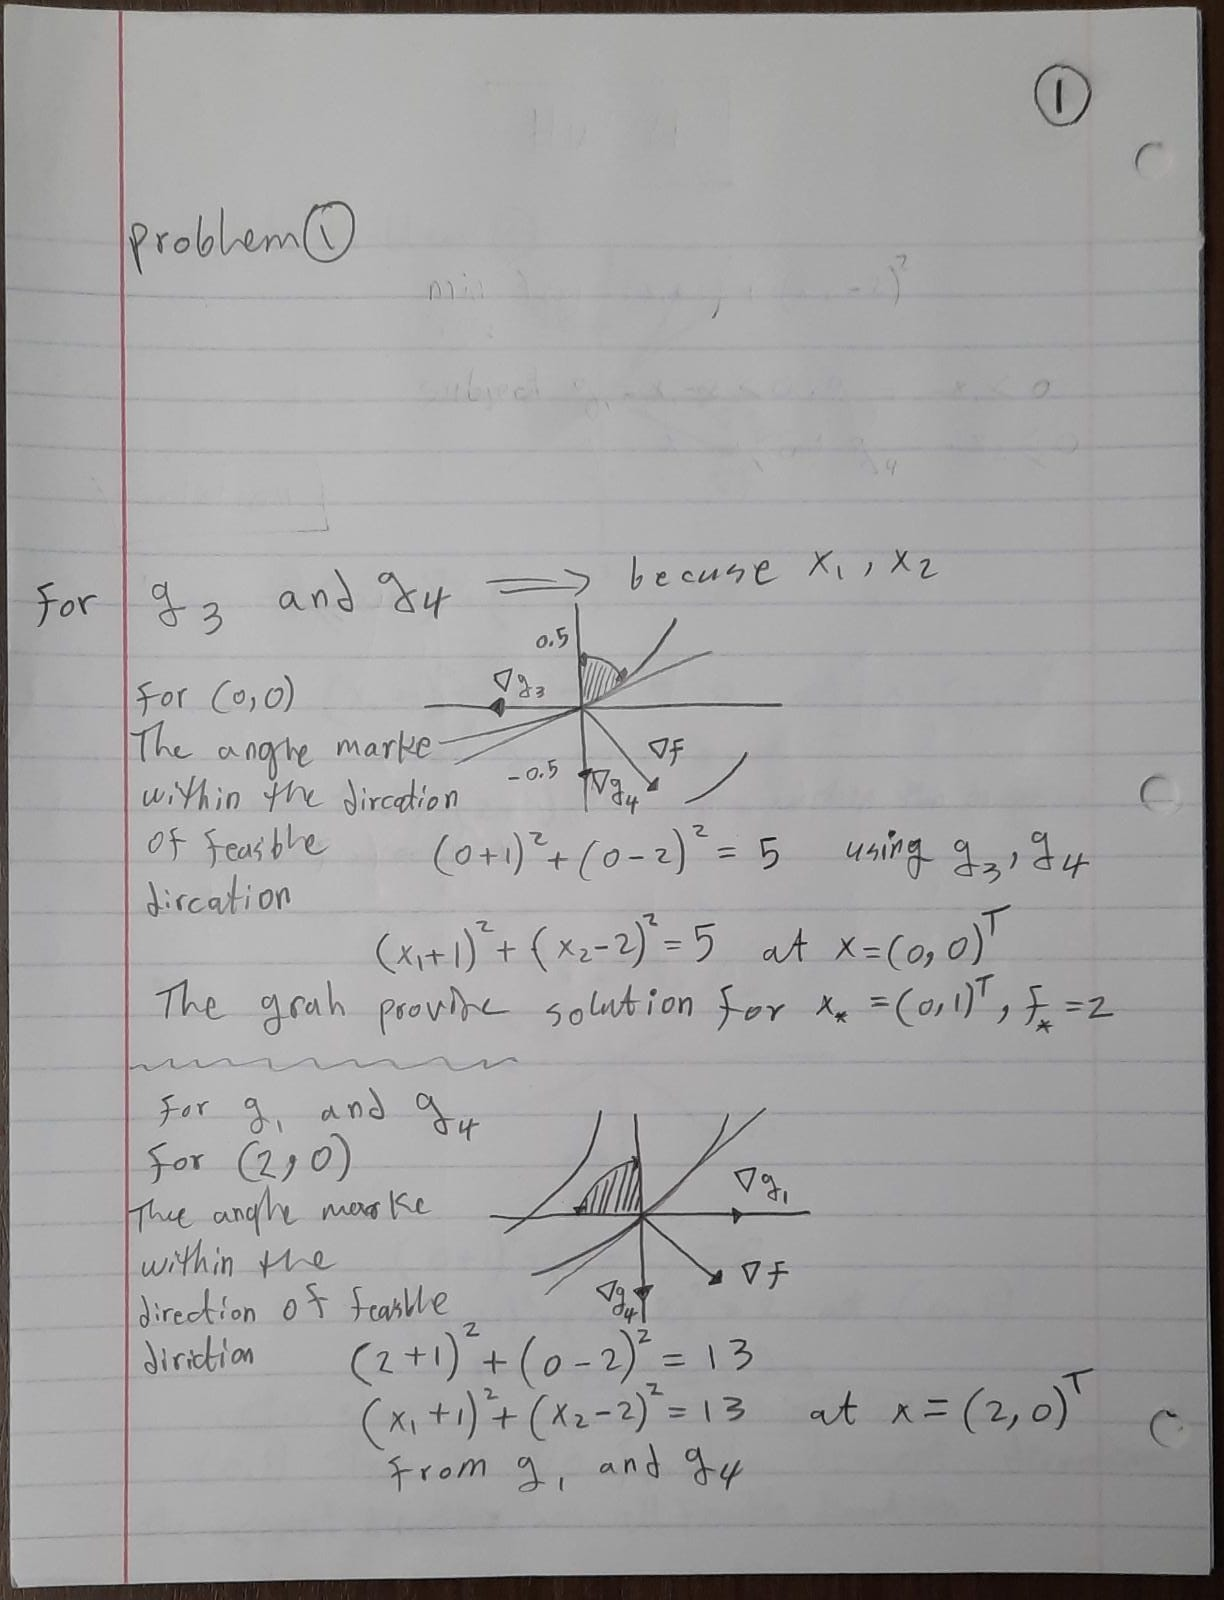

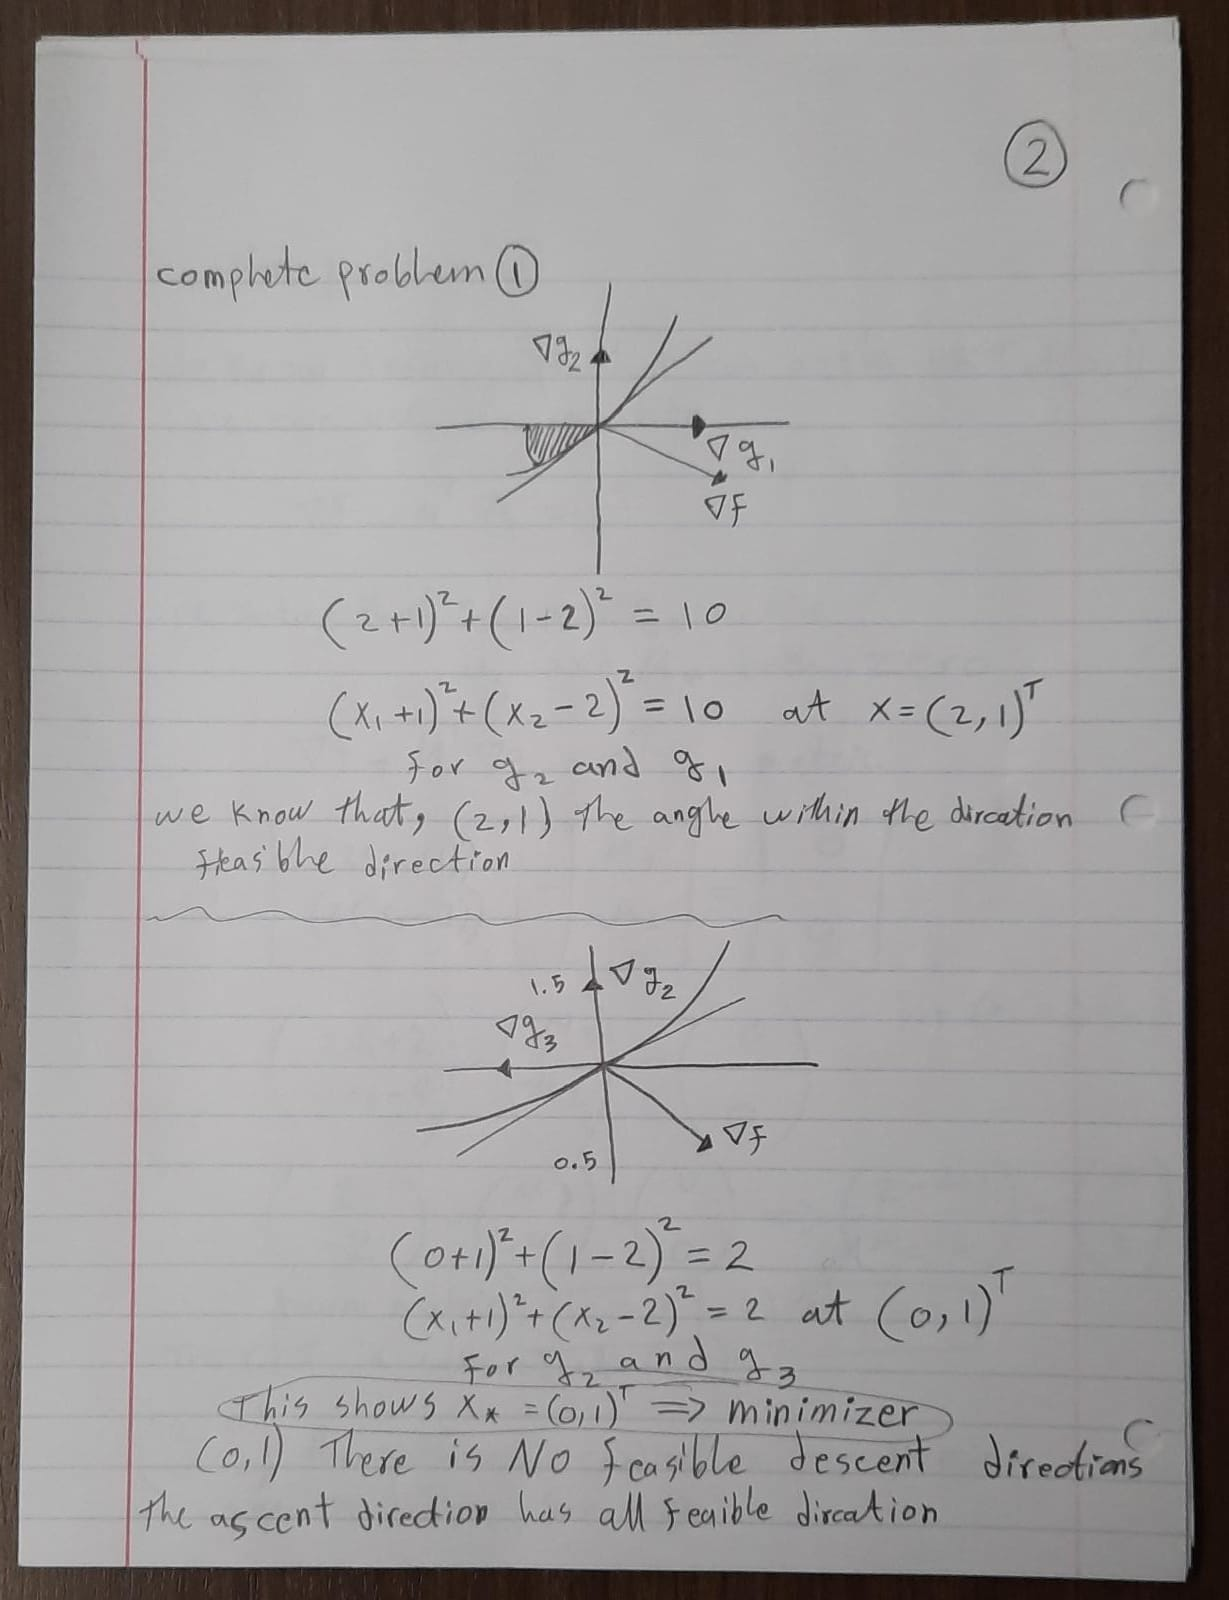

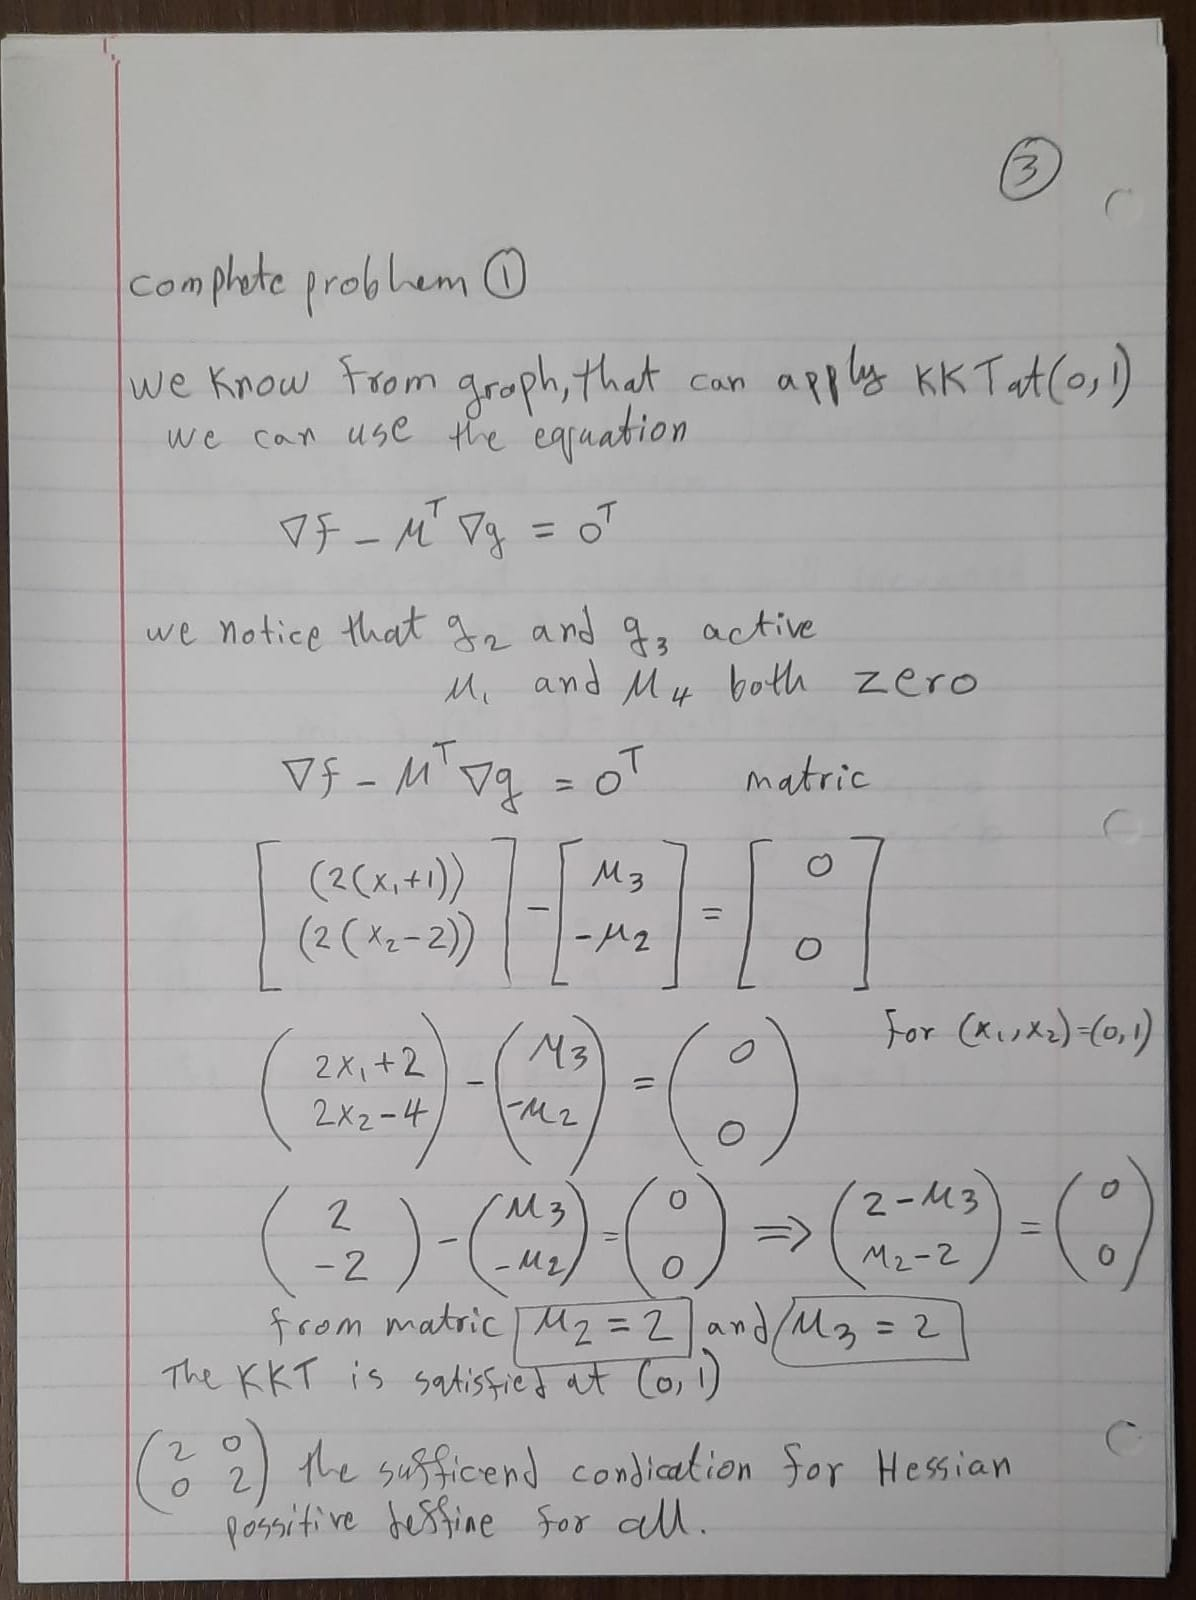

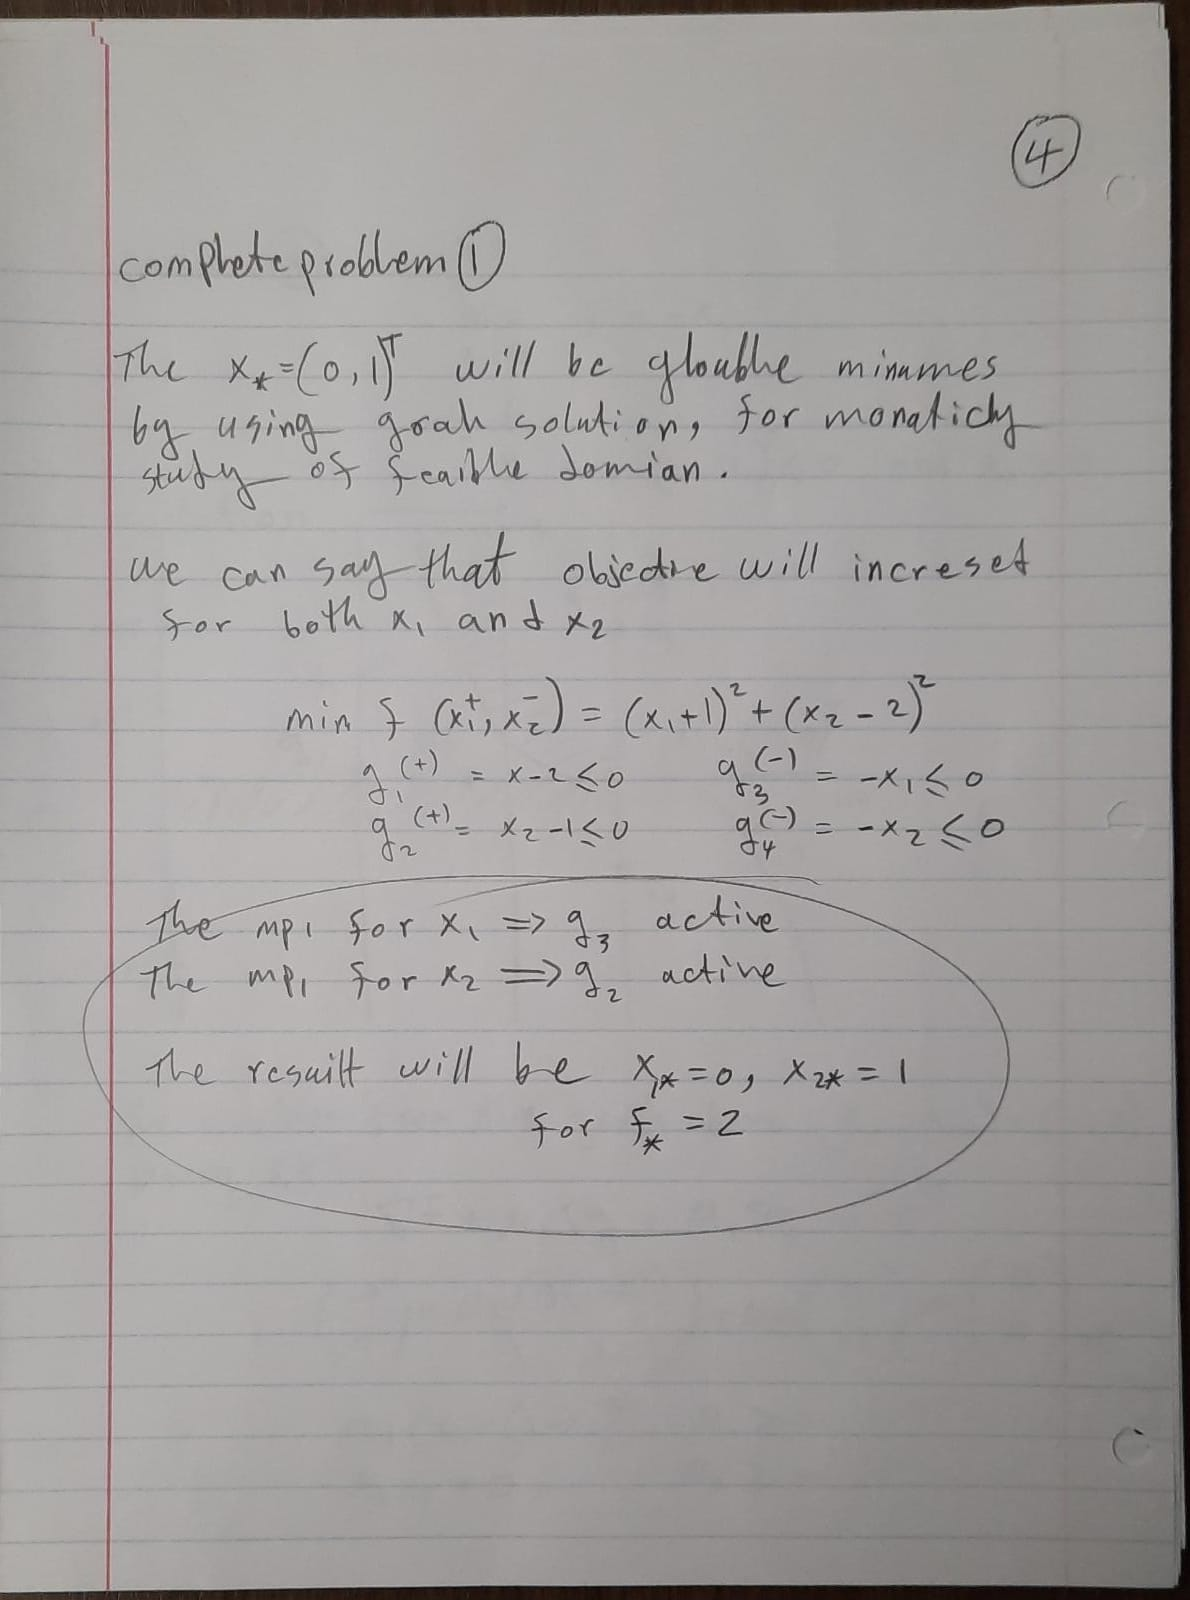

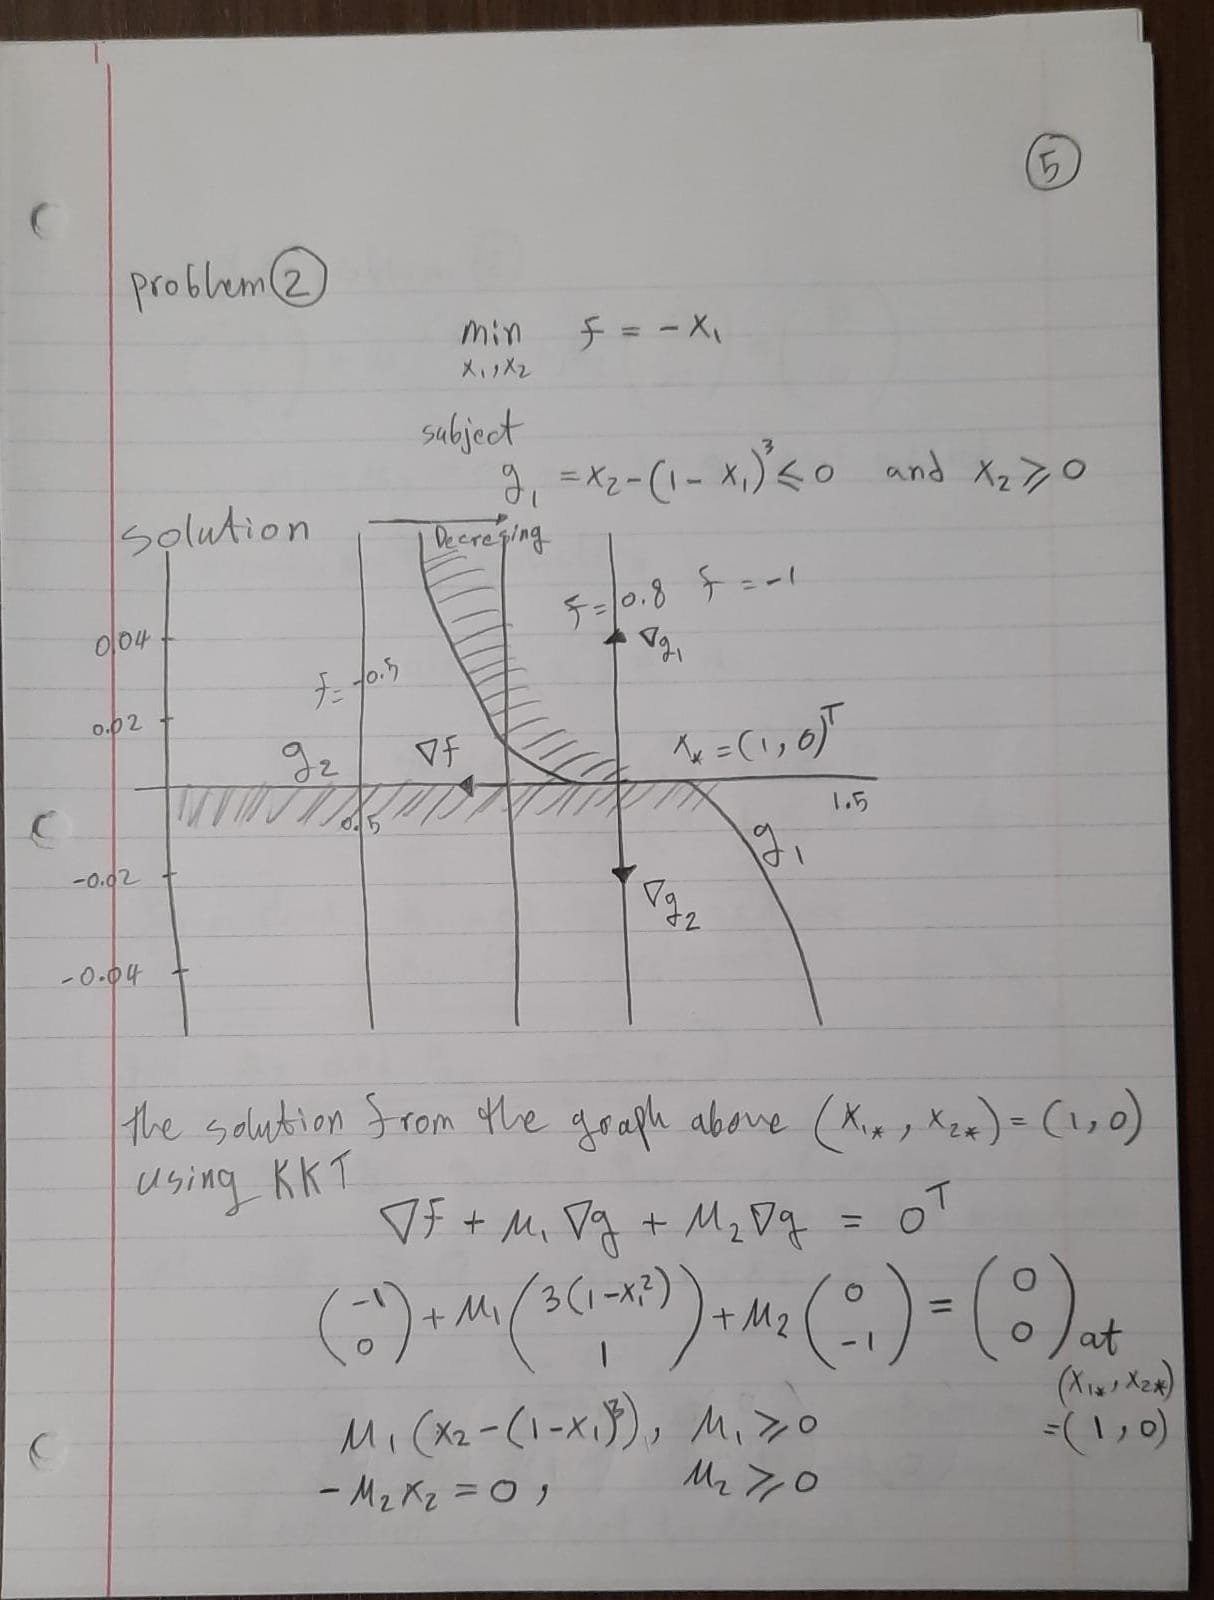

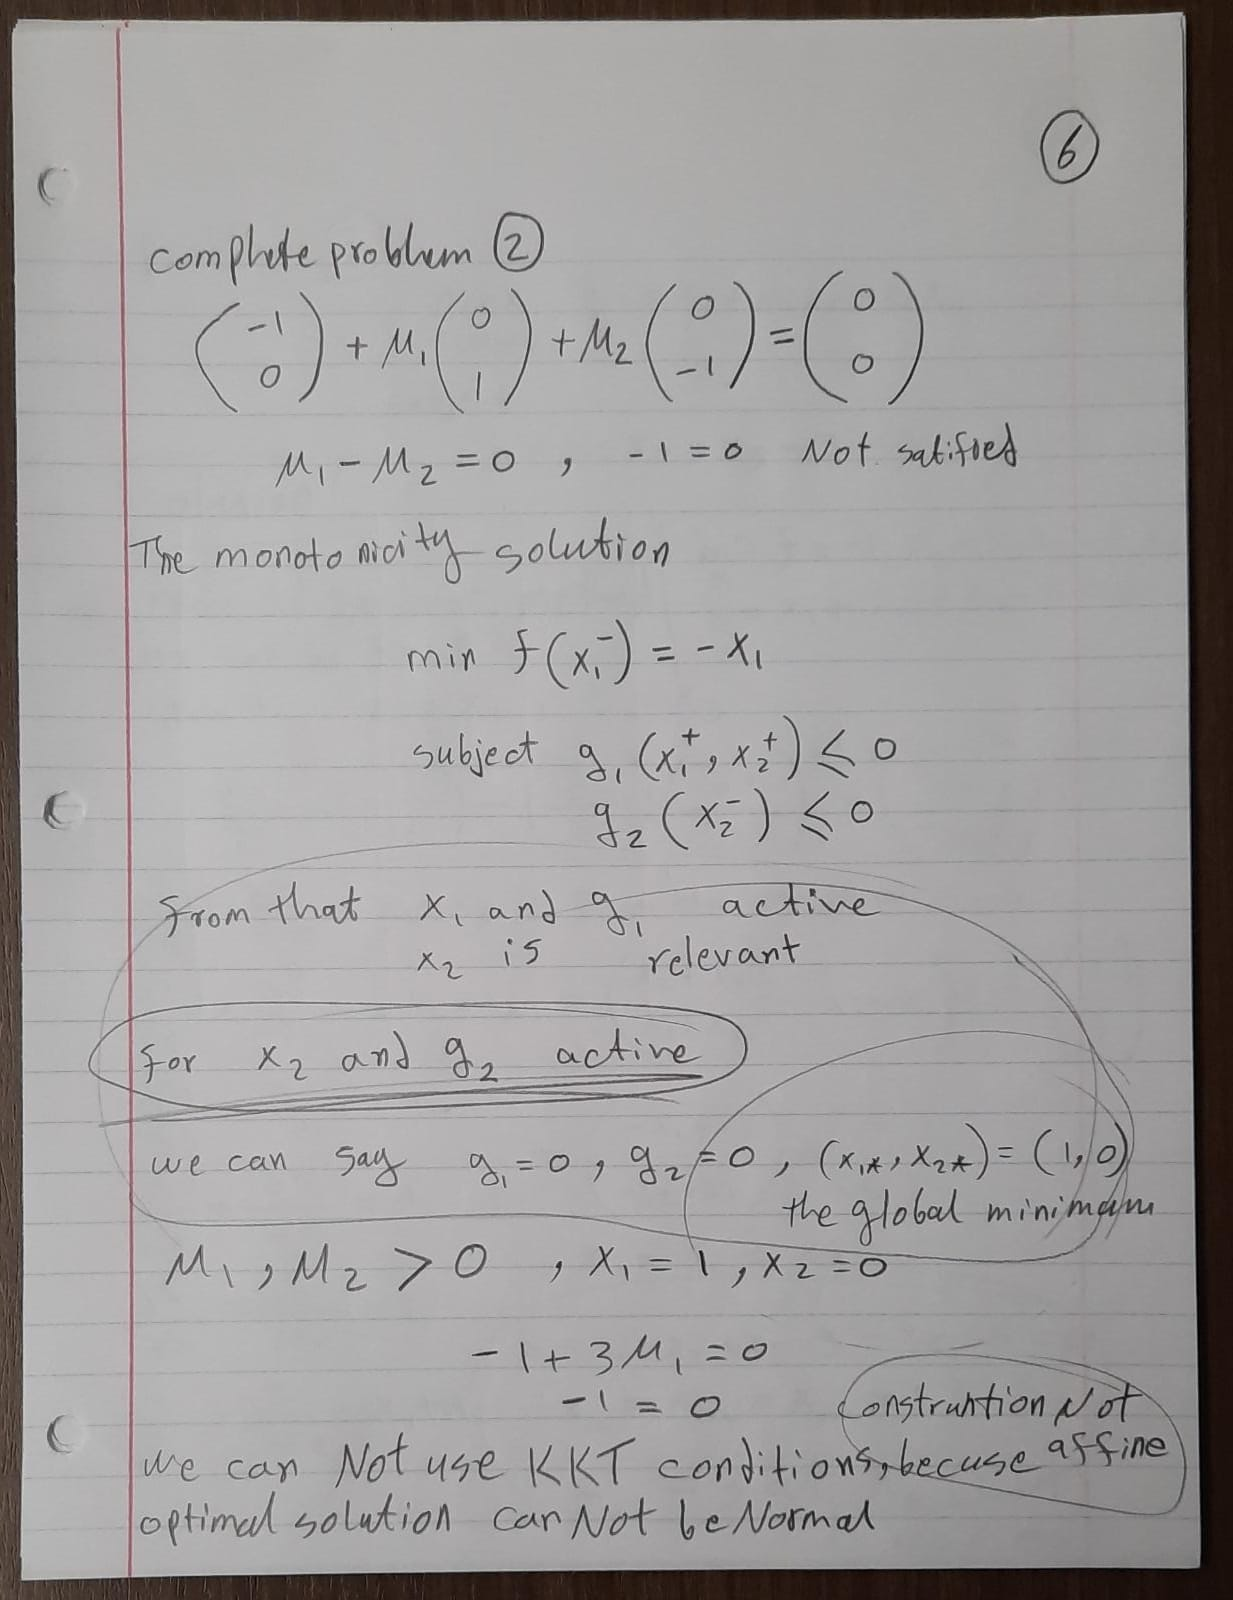

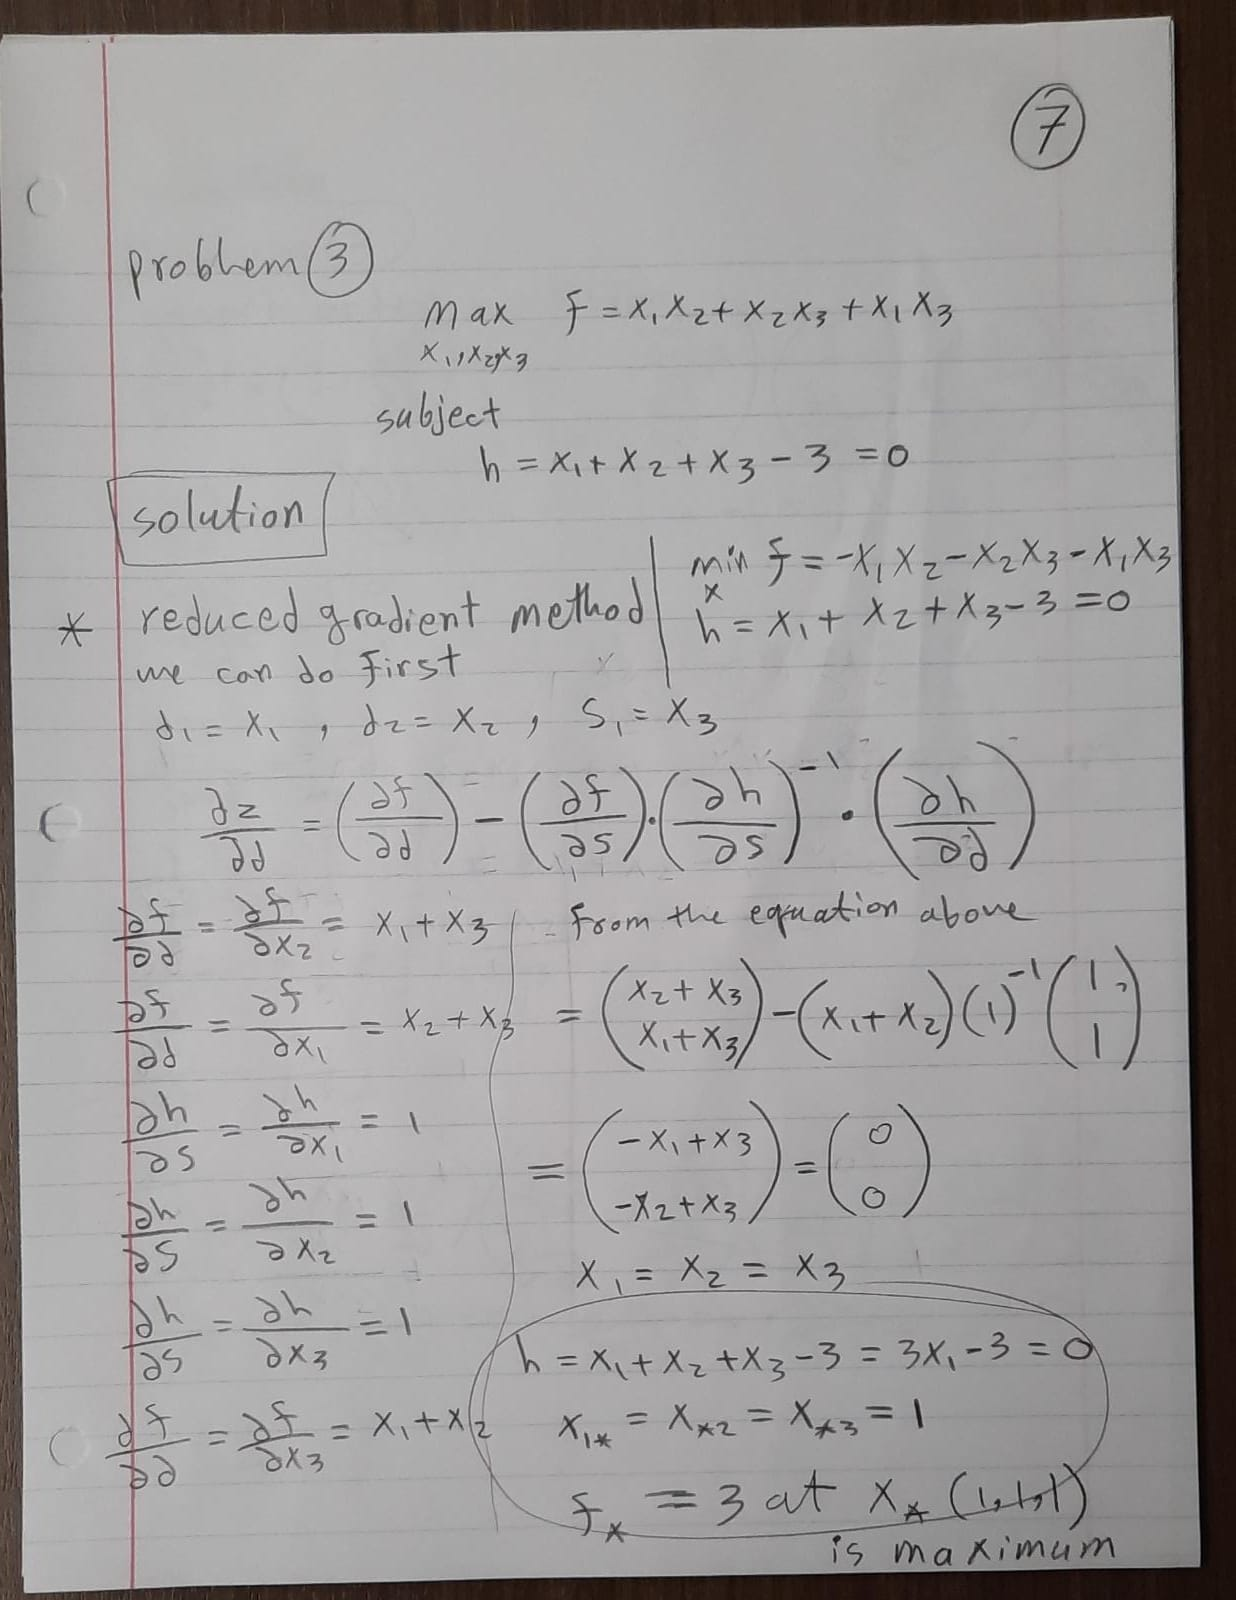

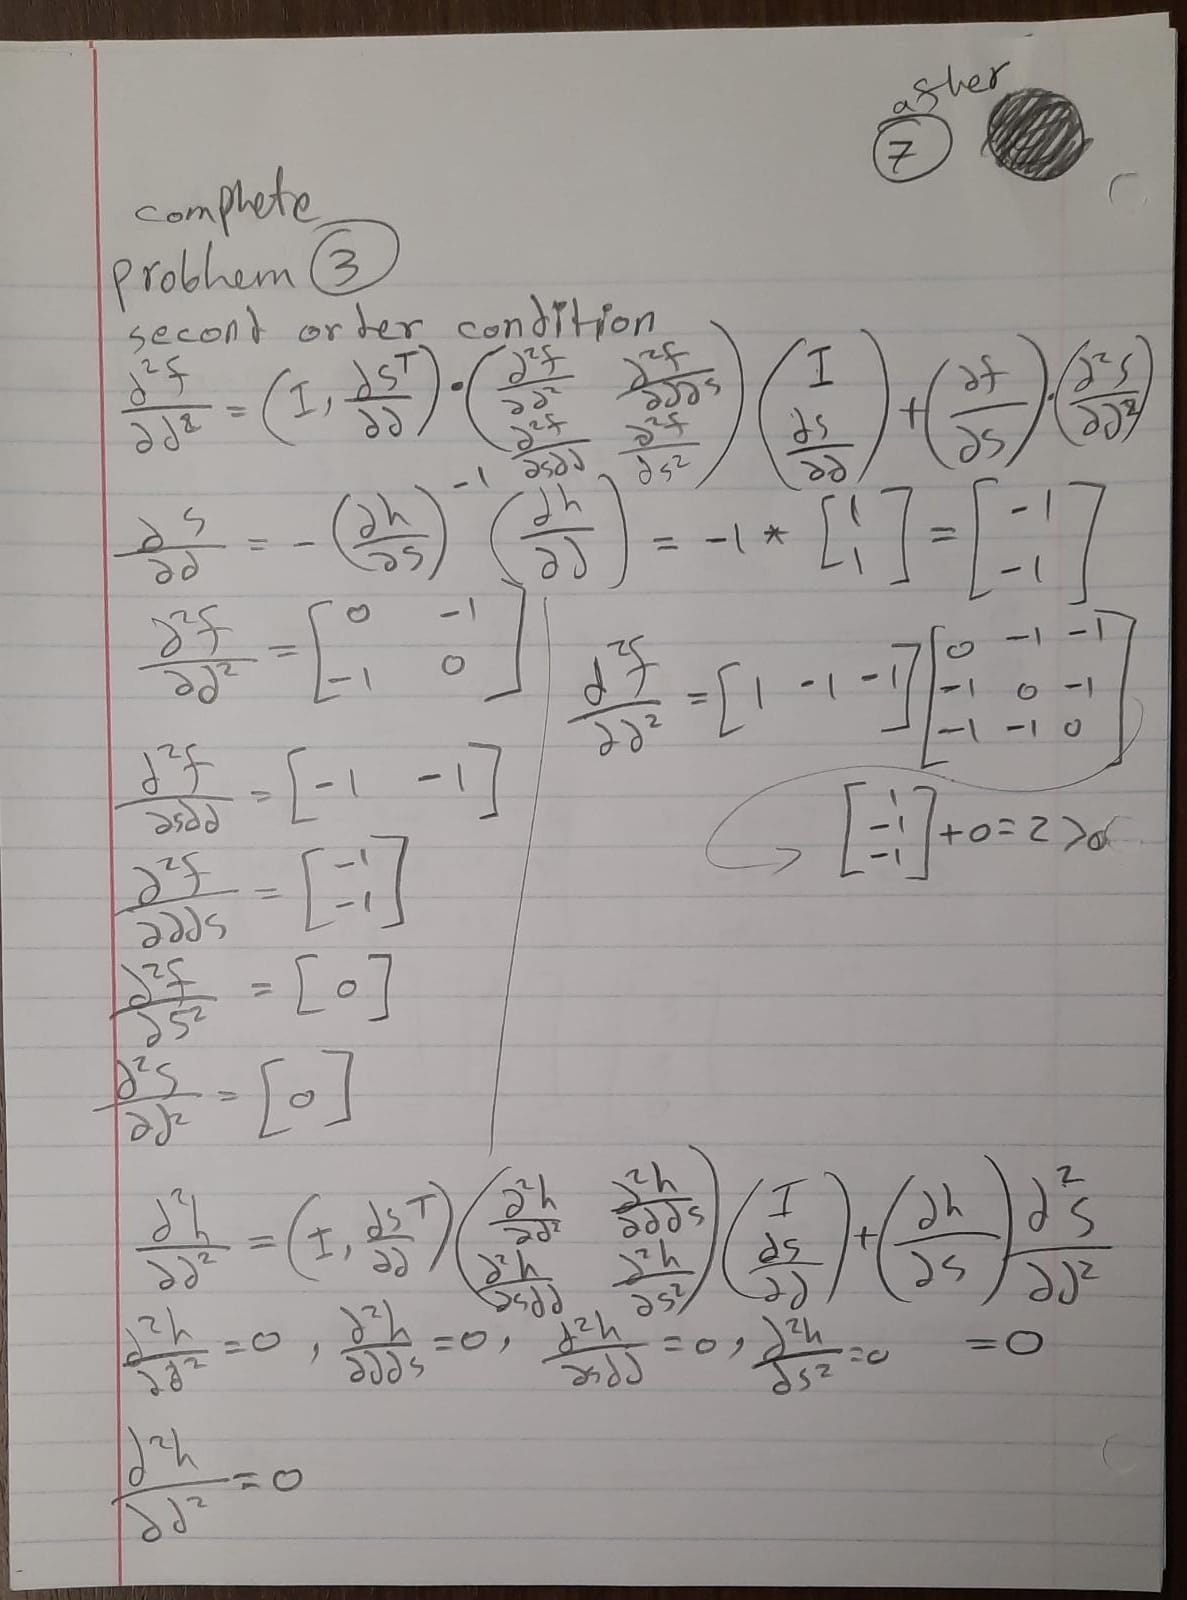

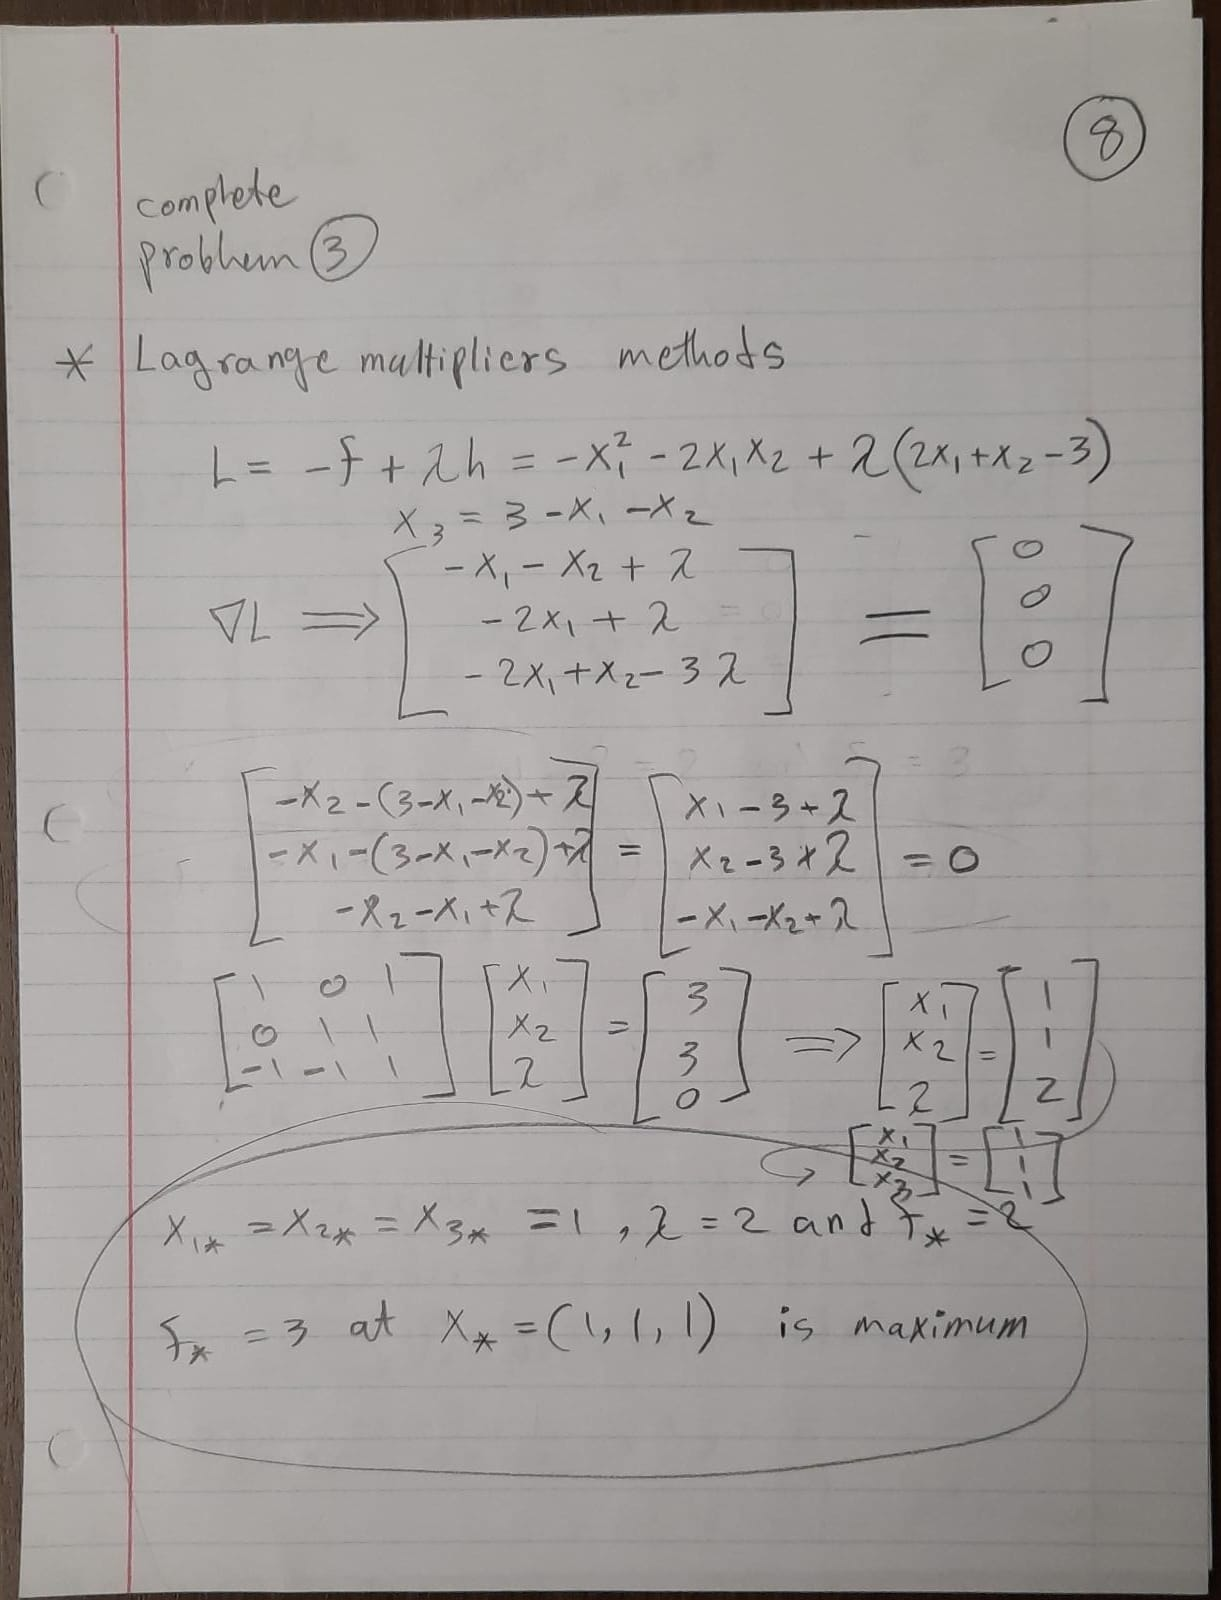

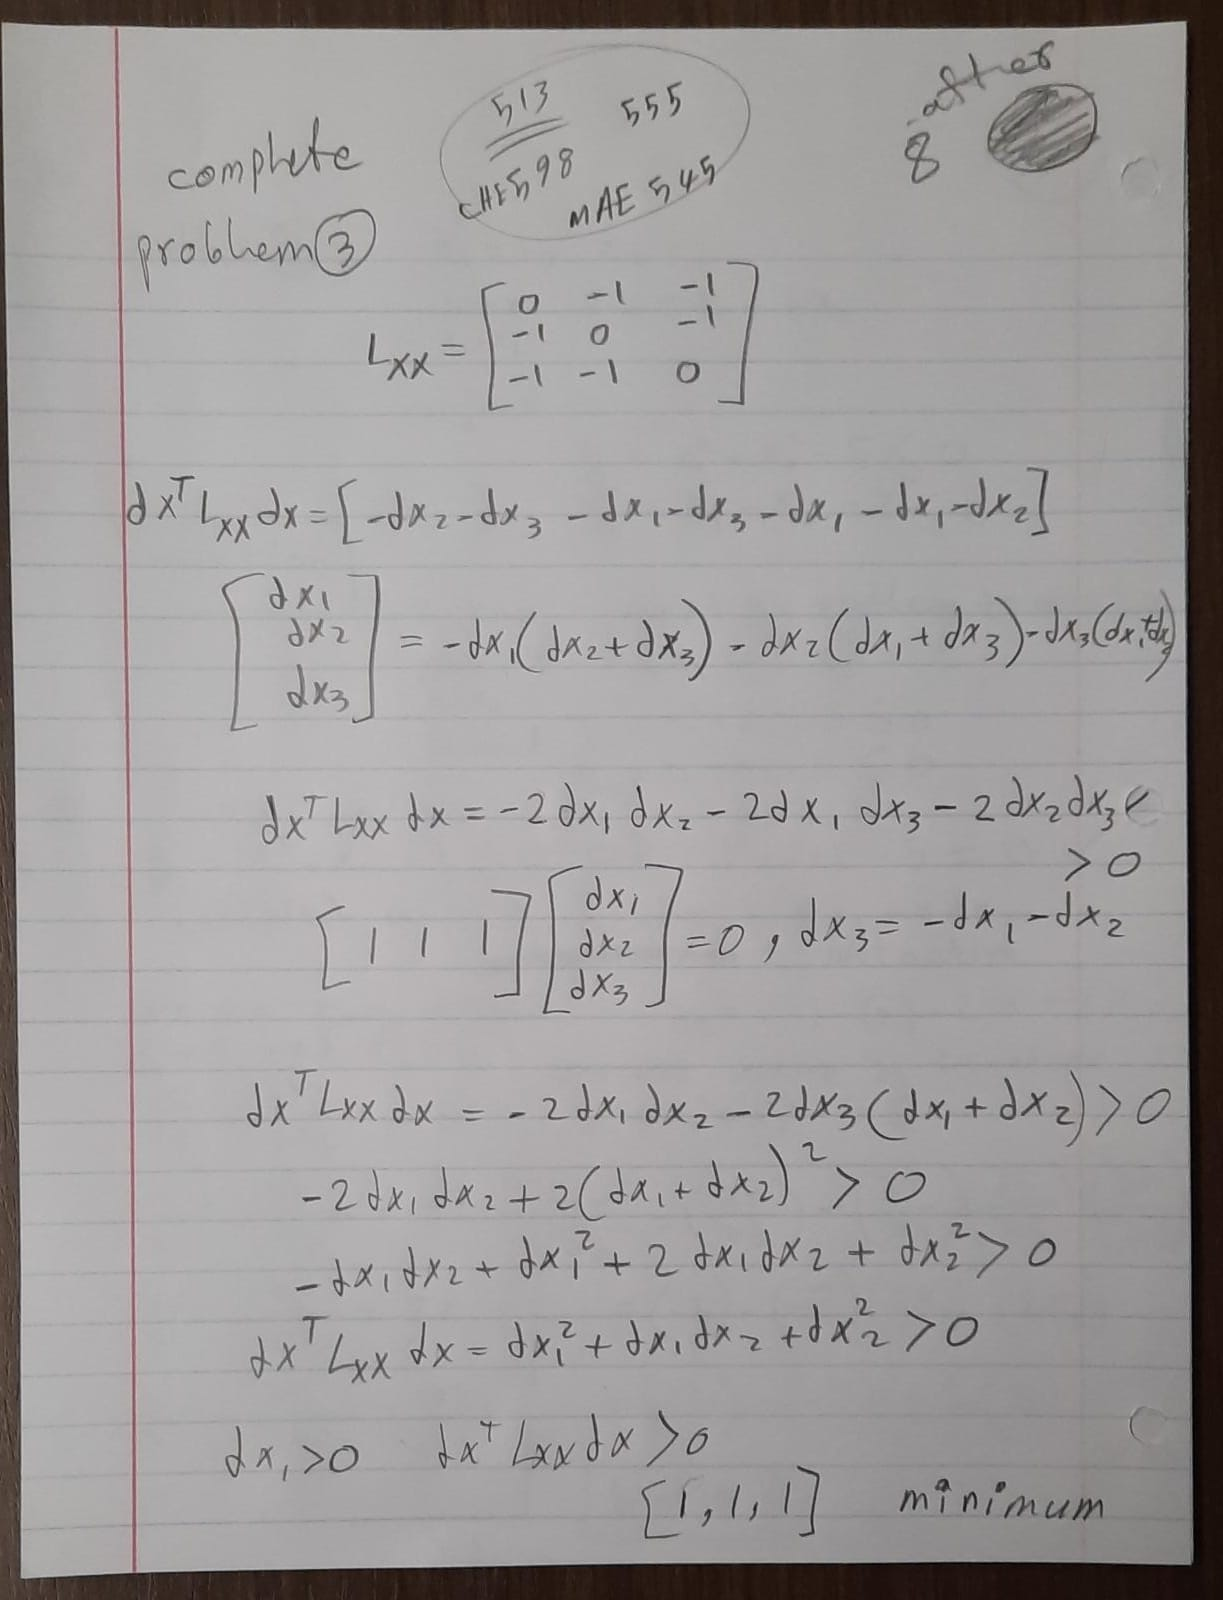

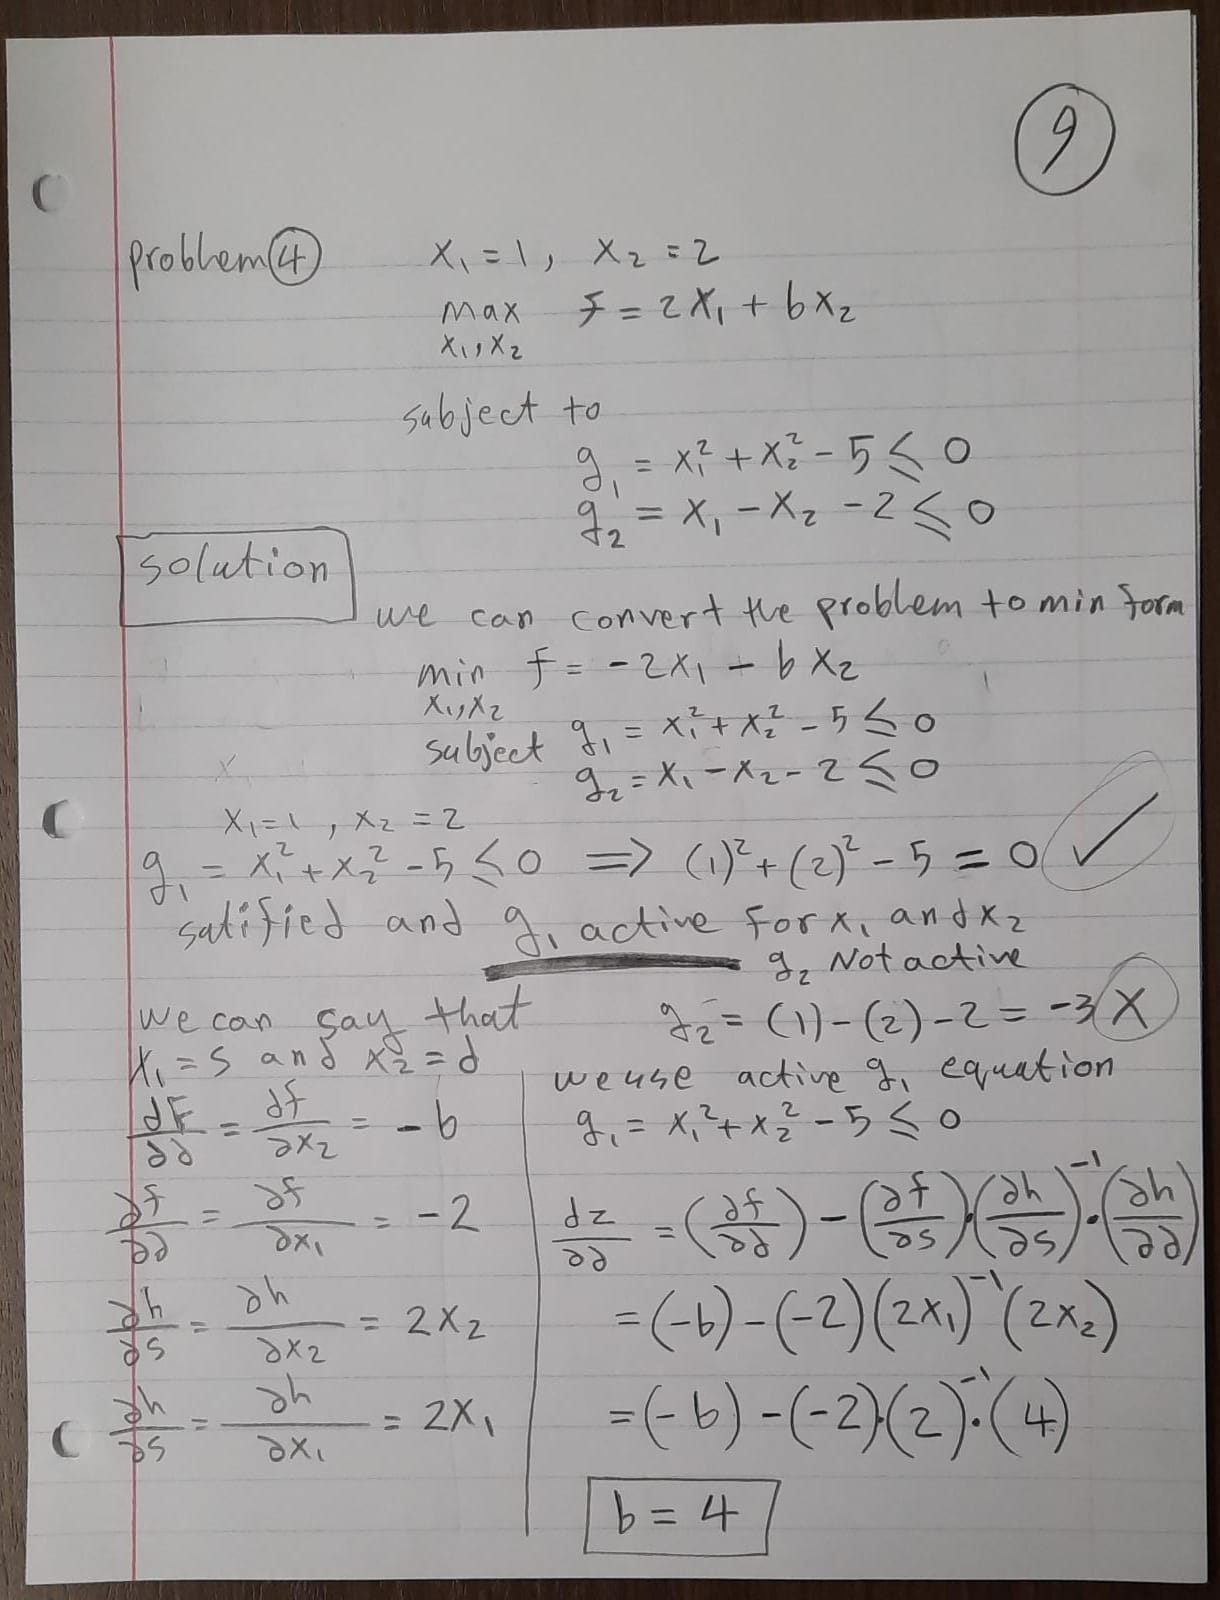

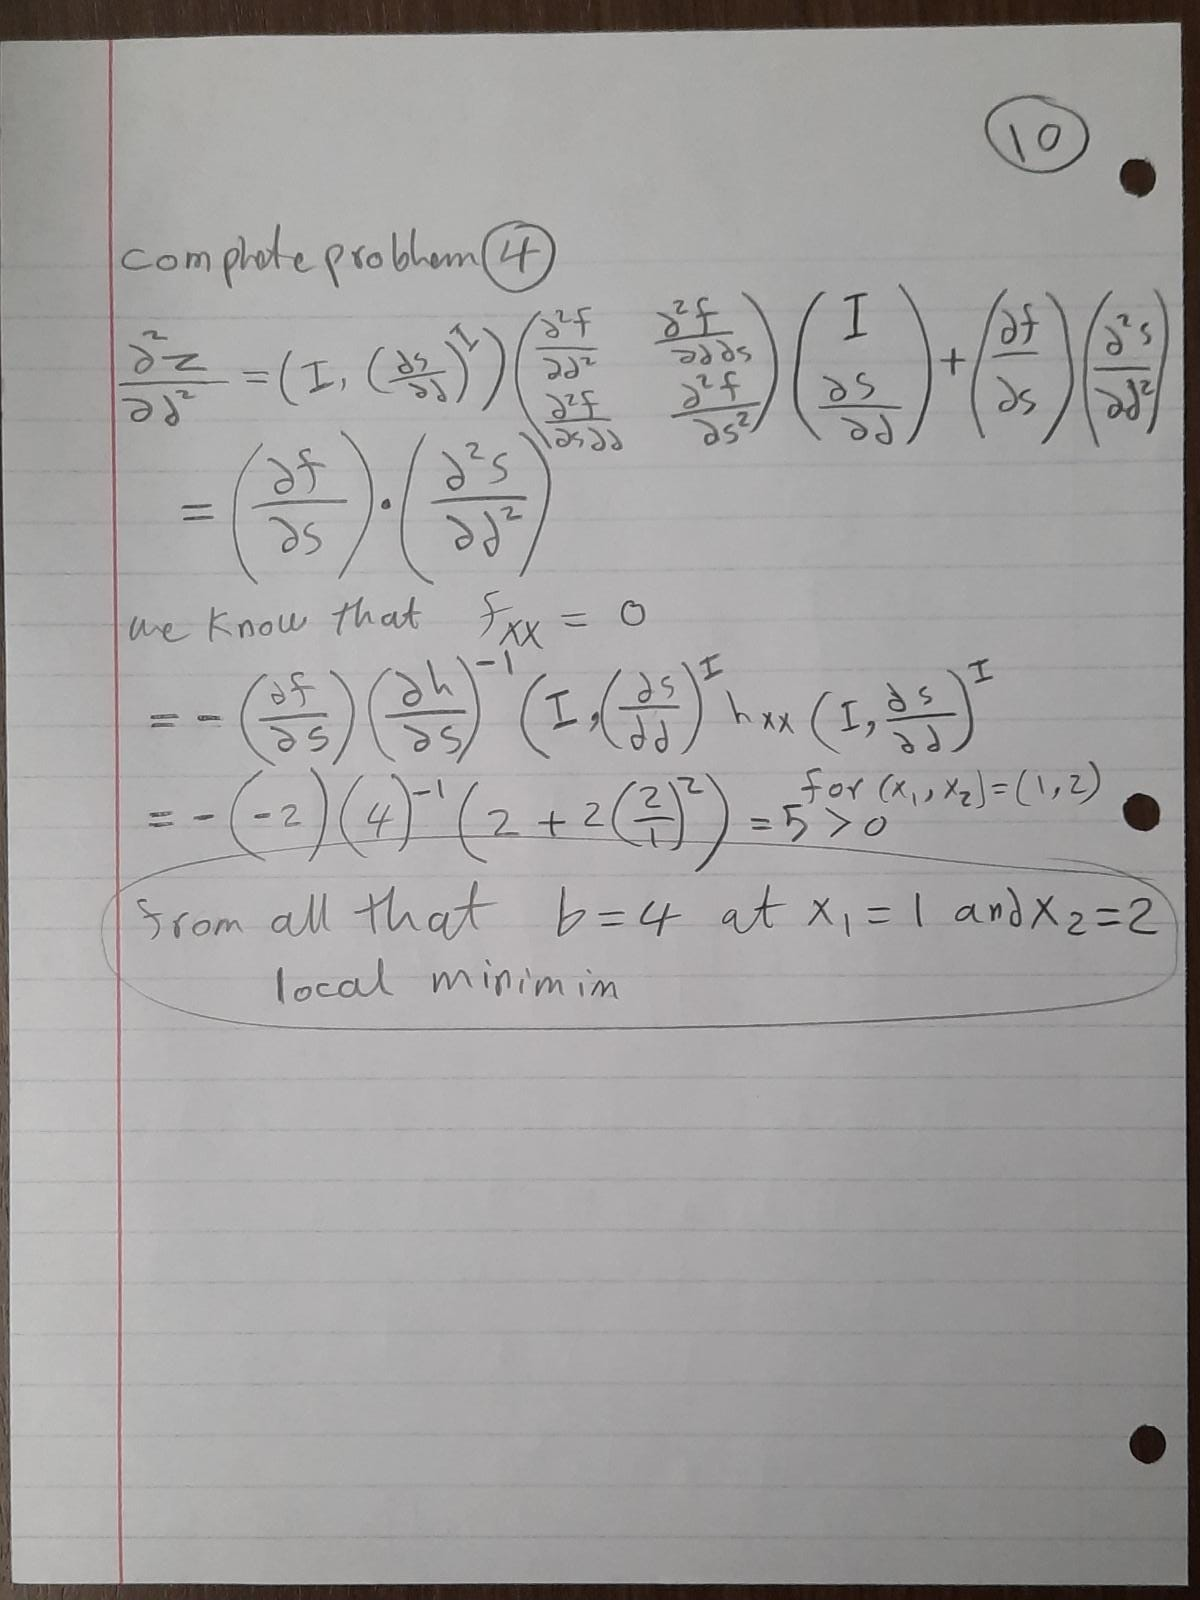

In [165]:
import numpy as np
import math

def obj(x): 
    return x[0]**2+x[1]**2+x[2]**2
def fp(x):
    x_1 = x[0]
    x_2 = x[1]
    return 2*x[0] 
def Pf(x):
    x_1 = x[0]
    x_2 = x[1]
    return np.array([2*x[1], 2*x[2]])
def ps(x):
    x_1 = x[0]
    x_2 = x[1]
    return np.array([[2/5*x[1], 2/25*x[2]],[1, -1]])
def pd(x):
    x_1 = x[0]
    return np.array([[x[0]/2],[1]])
def dd(x):   
    x_1 = x[0]
    x_2 = x[1]   
    return fp(x) - np.matmul( np.matmul(Pf(x), np.linalg.inv(ps(x))), pd(x) )
def xe(x,u,fdd): 
    m_e= (x[1]+u*fdd)[0]
    d_e= (x[0]-u*fdd)[0]
    s_e= x[1:3] + u* np.transpose( np.matmul(  np.matmul(np.linalg.inv(ps(x)) , pd(x) ), np.transpose([dd(x)]) ) )[0]
    return np.append(d_e,s_e)

def linesearch(dfd, x):
    dfd_1 = x[0]
    q = 0.8
    u=1
    p = 0.5
    f = 0.9
    while obj(xe(x,u,dfd)) > (obj(x) - u*0.3* dfd**2):
        u=0.5*u
    return u

def sol(x):  
    r = x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1
    w = x[0]+x[1]-x[2]
    while np.linalg.norm(np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ]))  > 10**(-3): 
        s_k= np.transpose( np.transpose([x[1:3]]) - np.matmul( np.linalg.inv(ps(x)), np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ]) ))  
        x=np.append(x[0:1], np.transpose(s_k[0]))
    return x  

x1=0
x3= 0.083 * (((1200/2)-170*(x1**2))**(0.5) +20/2*x1)

x2= x3-x1
x_x=[np.array([x1, x2, x3])]
while np.linalg.norm(dd(x_x[-1])) > 10**(-3):
    x=x_x[-1]
    dfdd=dd(x)
    a= linesearch(dfdd, x)
    x = sol(np.append(x[0]- a*dfdd,x[1:3] + a* np.transpose(  np.matmul(np.matmul(np.linalg.inv(Phps(x)), pd(x)),  np.transpose(dfdd)) )))
    x_x.append(x)
print('min solution for x1 x2 x3 are ' +str(x_x[-1]))


min solution for x1 x2 x3 are [-1.57399857  1.37737425 -0.19662432]
